In [9]:
# Importing required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
pip install pandas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Load your data

MarketBasket_df = pd.read_csv('/content/Market Basket Analysis - Groceries_dataset.csv')
MarketBasket_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [12]:
#check the information/description of the dataset's columns
MarketBasket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
# A bit of cleaning here
# Converting Member_number to a string since we wont be performing any computation on this feature
# Converting Date to a datetime format

MarketBasket_df['Member_number'] = MarketBasket_df['Member_number'].astype(str)
MarketBasket_df['Date'] = pd.to_datetime(MarketBasket_df['Date'], format='%d-%m-%Y')
MarketBasket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  object        
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# group items purchased per customer per day into a single basket
# Let's call that basket 'uniqueTransaction'

MarketBasket_df['uniqueTransaction'] = MarketBasket_df['Member_number']+ '_' + MarketBasket_df['Date'].astype(str)
MarketBasket_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,uniqueTransaction
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [15]:
# A little detour, just to take a peek into a particular customer (2552)'s purchases.
# We can see he made purchases on 5 different days.
# All his purchases per day have the same uniqueTransaction

oneCustomerCheck = MarketBasket_df[MarketBasket_df['Member_number'] == '2552'].sort_values('Date')
oneCustomerCheck.head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription,uniqueTransaction
14417,2552,2014-02-19,other vegetables,2552_2014-02-19
30566,2552,2014-02-19,chocolate,2552_2014-02-19
11361,2552,2014-06-20,female sanitary products,2552_2014-06-20
27510,2552,2014-06-20,whole milk,2552_2014-06-20
38604,2552,2014-06-20,hygiene articles,2552_2014-06-20
12226,2552,2014-07-11,pot plants,2552_2014-07-11
28375,2552,2014-07-11,shopping bags,2552_2014-07-11
38452,2552,2014-07-11,coffee,2552_2014-07-11
11292,2552,2014-10-08,butter,2552_2014-10-08
27441,2552,2014-10-08,root vegetables,2552_2014-10-08


In [16]:
# Creating a cross-tabulation (cross-tab) of the 'uniqueTransaction' and 'itemDescription' columns from the DataFrame 'data'
# Cross-tabulation is a way to represent the frequency or relationship between two categorical variables
# In this case, it's creating a table that shows how many times each item appears in each unique transaction
basket = pd.crosstab(MarketBasket_df['uniqueTransaction'], MarketBasket_df['itemDescription'])
basket.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# function converts each element to 1 if its value is greater than 0, otherwise to 0
# This is often done in the context of association rule mining, where binary values (1 or 0) represent the presence or absence of an item in a transaction
apriori_df = basket.applymap(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
apriori_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
uniqueTransaction,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_2015-05-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4999_2015-12-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5000_2014-03-09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Applying the Apriori algorithm to generate frequent itemsets from the binary-encoded DataFrame 'apriori_df'
# The 'min_support' parameter is set to 0.005, indicating the minimum support threshold for an itemset to be considered frequent
# 'use_colnames=True' ensures that item names are used instead of column indices in the resulting DataFrame
frequent_itemsets = apriori(apriori_df, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
35,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
0,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874,-0.000702
1,(whole milk),(bottled beer),0.157923,0.045312,0.007151,0.045281,0.999330,-0.000005,0.999968,-0.000795
32,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
33,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


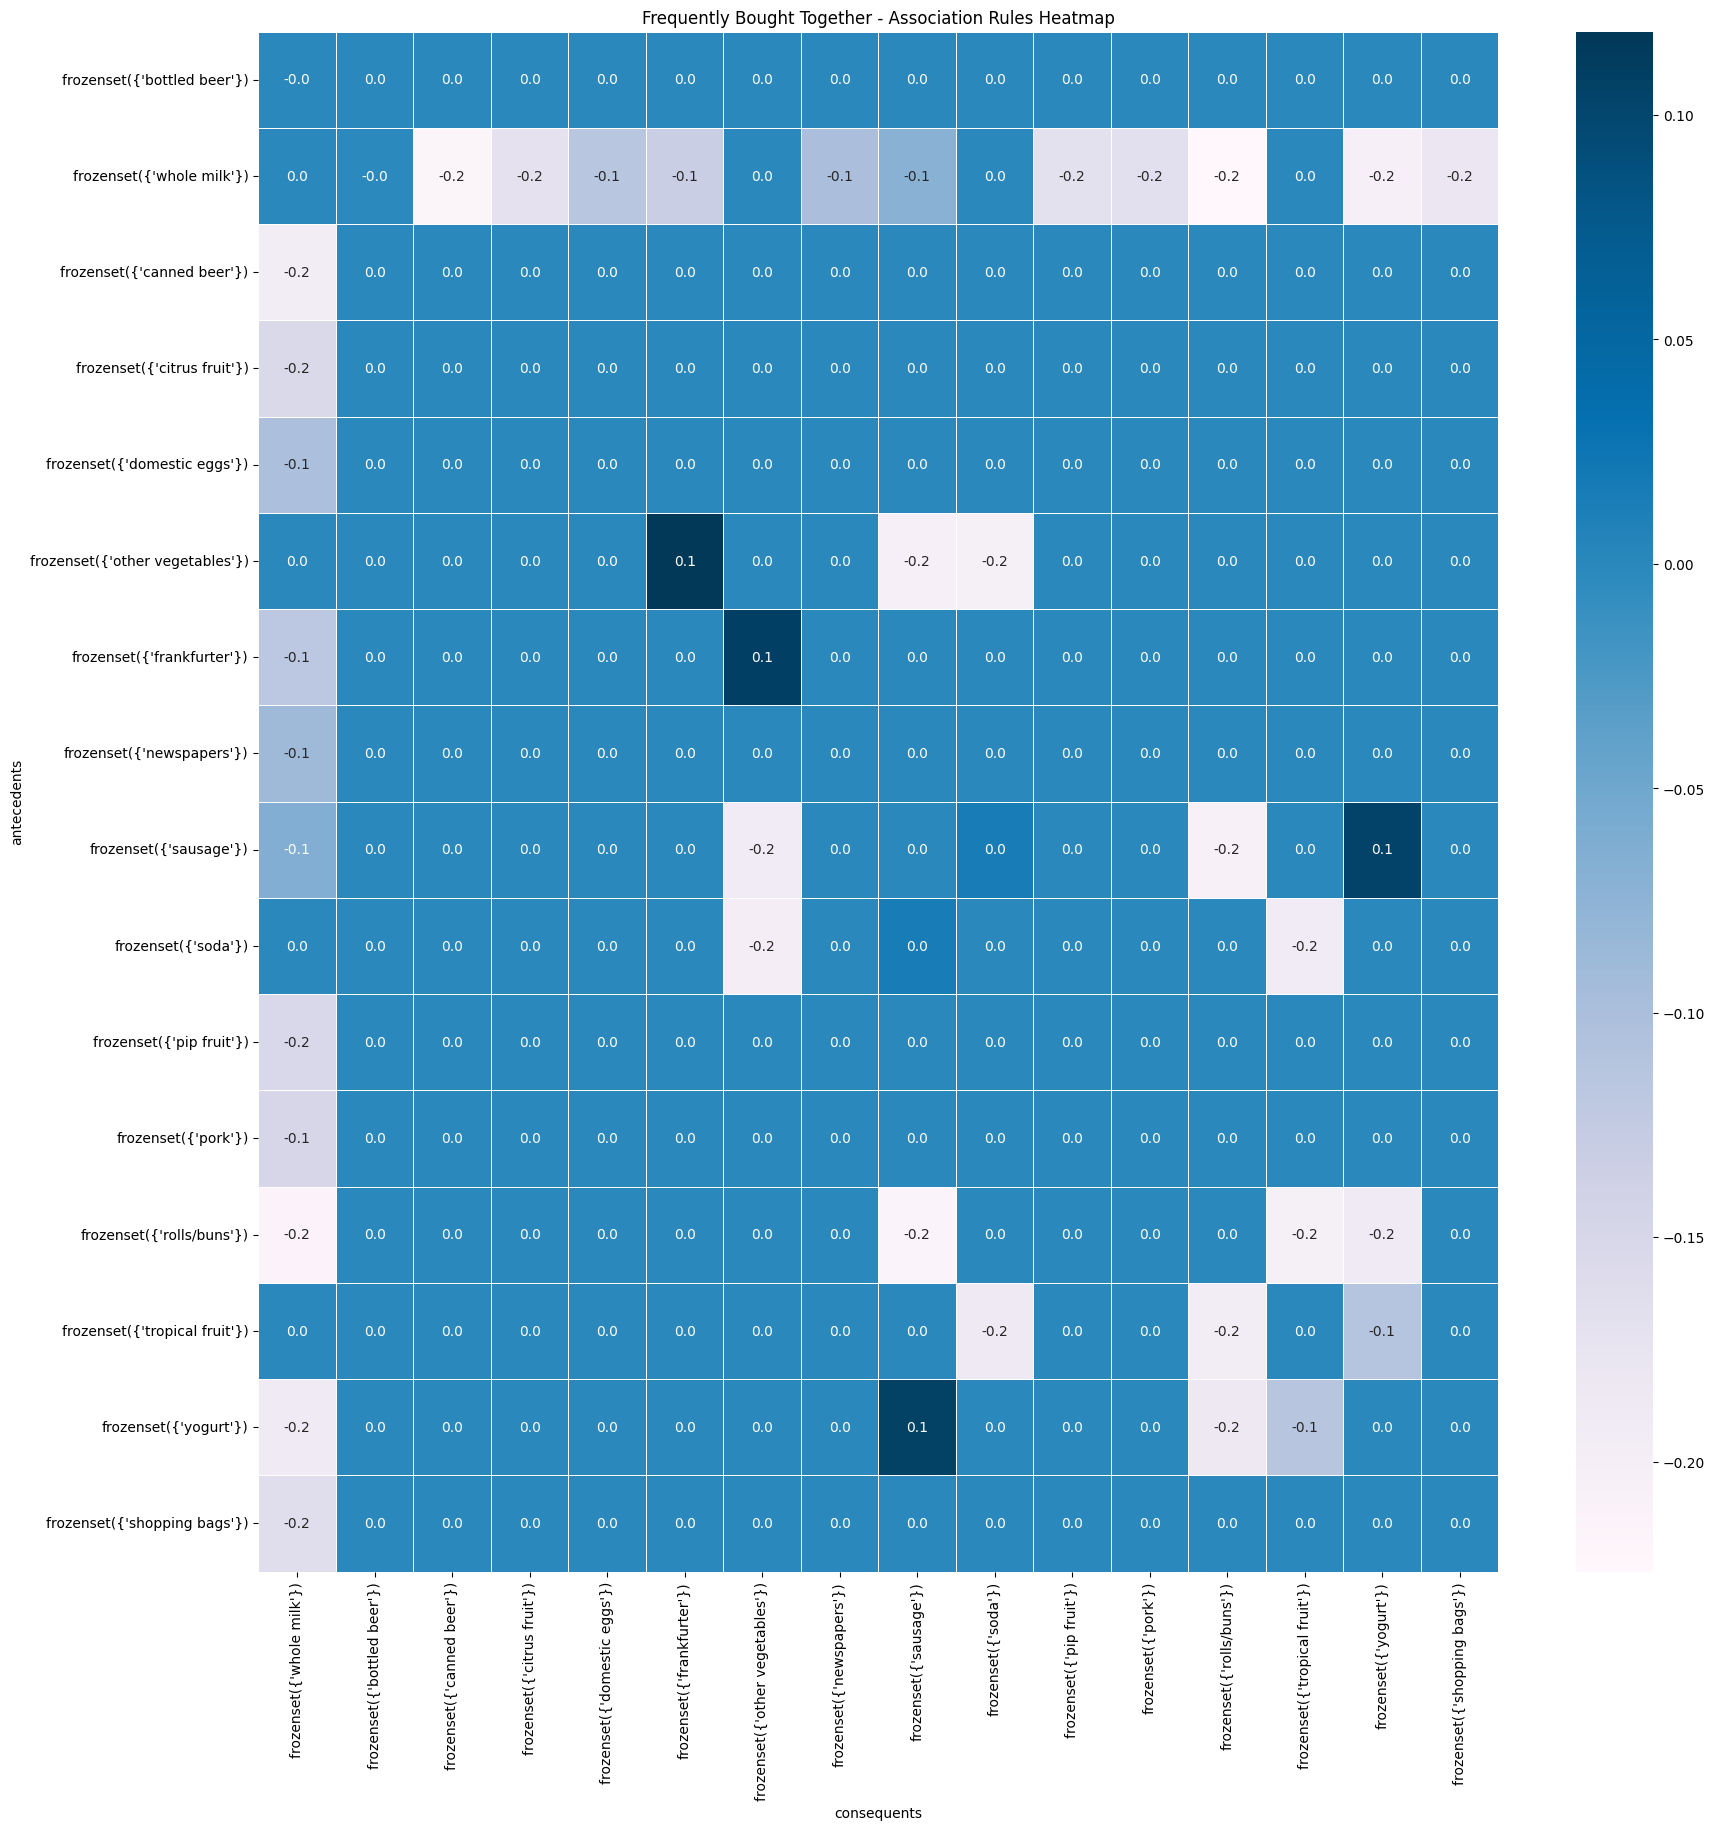

In [20]:
# Creating a matrix of product associations
product_associations = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(product_associations, annot=True, cmap="PuBu", fmt=".1f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()

# I used Zhang's metric in my viz because it combines support, confidence, and lift into a single measure.
# A negative value suggests that the occurrence of the antecedent reduces the likelihood of the consequent.
# It implies that despite a certain level of confidence, the occurrence of the antecedent reduces the overall support or likelihood of the consequent, leading to a negative impact or anti-association.
# In practical terms, a negative Zhang's metric might suggest scenarios where the presence of one item in a transaction makes the occurrence of another item less likely than expected.
# A positive Zhang's metric would the opposite

In [21]:
# Taking pairs with positive Zhang's metric in a separate dataframe

pos_pair = rules[rules['zhangs_metric'] > 0]

pos_pair.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
9,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
30,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
31,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
34,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


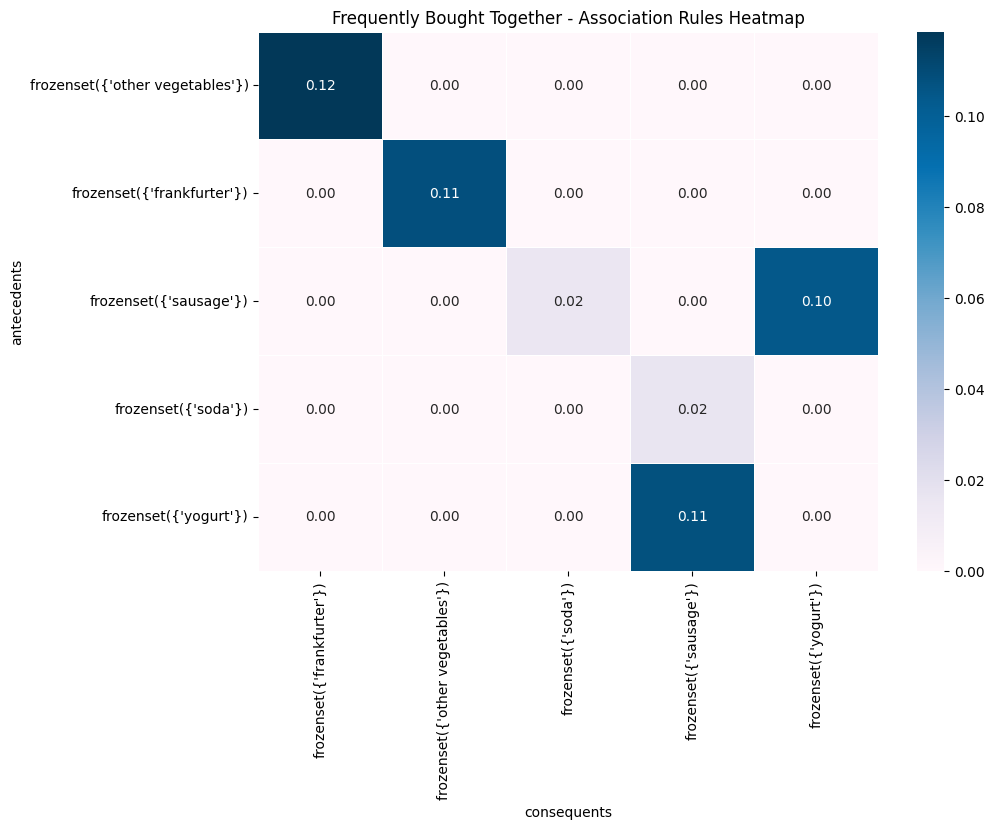

In [22]:
# Creating a matrix of product associations
pos_association = pos_pair.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)

# Create a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(pos_association, annot=True, cmap="PuBu", fmt=".2f", linewidths=.5)
plt.title("Frequently Bought Together - Association Rules Heatmap")
plt.show()